In [1]:
!pip install gensim

In [16]:
import gensim

import gensim.downloader

In [2]:
#Example from directions
# Load pre-trained Word2Vec model trained on wikipedia data

model = gensim.downloader.load("glove-wiki-gigaword-100")
# Getting the vector for a word

dog = model['dog']

# Getting the most similar words

print(model.most_similar('dog', topn=5))

# Getting the similarity between two words

print(model.similarity('dog', 'cat'))

[==================================================] 100.0% 128.1/128.1MB downloaded
[('cat', 0.8798075318336487), ('dogs', 0.834430992603302), ('pet', 0.7449565529823303), ('puppy', 0.723637580871582), ('horse', 0.7109653949737549)]
0.8798075


In [3]:
# Load pre-trained Word2Vec model trained on wikipedia data
#finding the most similar words to a word I choose

model = gensim.downloader.load("glove-wiki-gigaword-100")
# Getting the vector for a word

baseball = model['baseball']

# Getting the most similar words

print(model.most_similar('baseball', topn=5))

# Getting the similarity between two words

print(model.similarity('baseball', 'base'))

[('basketball', 0.7645361423492432), ('leagues', 0.7626137137413025), ('football', 0.76057368516922), ('league', 0.7323171496391296), ('hockey', 0.7312085628509521)]
0.32313913


In [4]:
#Example from directions
#we can extract a "capital vector" by subtracting the vector for a country from the vector for its capital
capital= model["berlin"]-model['germany']

fra_capital=model["france"]+capital

print(model.most_similar(fra_capital))
#likewise, we can extract a "plural vector" by subtracting the vector for a singular noun from the vector for its plural
plural=model["cats"]-model["cat"]

print(model.most_similar(plural))

#we can also add vectors together
plural_dogs=model["dog"]+plural

print(model.most_similar(plural_dogs))

[('paris', 0.8827145099639893), ('france', 0.755802571773529), ('french', 0.7075164318084717), ('prohertrib', 0.6943174004554749), ('berlin', 0.6665561199188232), ('brussels', 0.6574430465698242), ('lyon', 0.6526200771331787), ('london', 0.64079749584198), ('le', 0.6403627395629883), ('strasbourg', 0.6346526741981506)]
[('lowlanders', 0.4844588041305542), ('zebras', 0.45914992690086365), ('dicots', 0.4533276855945587), ('non-arabs', 0.45208775997161865), ('amerindians', 0.4478239119052887), ('buffalos', 0.4475124180316925), ('giraffes', 0.4466330111026764), ('bavarians', 0.4452260732650757), ('welshmen', 0.4440663158893585), ('dingos', 0.4440328776836395)]
[('dogs', 0.8921768069267273), ('cats', 0.8814380764961243), ('dog', 0.7873795628547668), ('animals', 0.7512702345848083), ('pets', 0.7392117977142334), ('cows', 0.6835323572158813), ('pet', 0.6792976260185242), ('horses', 0.6774963736534119), ('pigs', 0.6755764484405518), ('animal', 0.6683686971664429)]


In [5]:
# this can be used to find examples of data bias in word embeddings

# for example, we can find the most similar words to "doctor" and "nurse"

gender=model["woman"]-model["man"]

print(model.most_similar(gender))
print(model.most_similar(-gender))

model.most_similar(model["doctor"]+gender)


[('menstruating', 0.6102039217948914), ('miscarry', 0.5550354719161987), ('lactating', 0.542172908782959), ('pre-eclampsia', 0.5129693150520325), ('uterus', 0.5093088746070862), ('ovulating', 0.5070309042930603), ('miscarried', 0.5043483972549438), ('adoptee', 0.5012543201446533), ('comnena', 0.5012539625167847), ('pulecio', 0.5003889799118042)]
[('arsene', 0.4388486444950104), ('ancelotti', 0.4215139150619507), ('nistelrooy', 0.41140037775039673), ('strachan', 0.4089668393135071), ('rafa', 0.4072844088077545), ('technicals', 0.40608730912208557), ('allardyce', 0.4018688201904297), ('boss', 0.40107354521751404), ('rangers', 0.39962300658226013), ('utd', 0.3967454433441162)]


[('doctor', 0.8661208748817444),
 ('nurse', 0.7757077813148499),
 ('physician', 0.7128061652183533),
 ('woman', 0.7089029550552368),
 ('doctors', 0.6793617606163025),
 ('pregnant', 0.6787967681884766),
 ('patient', 0.6772218346595764),
 ('dentist', 0.6694241762161255),
 ('mother', 0.6586816310882568),
 ('medical', 0.6466938257217407)]

These results do make snese based on gender and what is being printed.

Part 1b: There is a bias in the occupations described in the word embeddings; doctors are tradionally a "male" role, and the model is assuming that the word doctor goes with male, and nurse with female, for example, but it isn't always so clear-cut. 

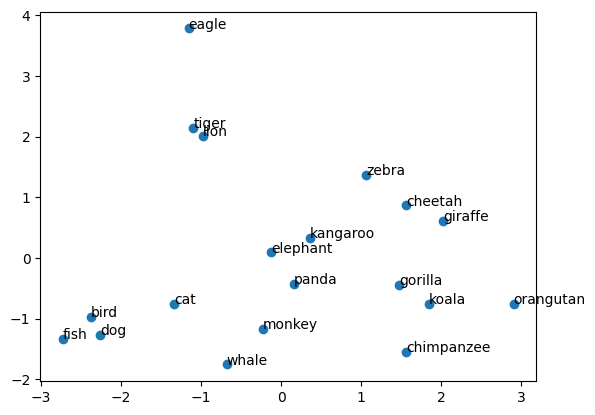

In [6]:
#Example from directions
#visualize pca of word embeddings


from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=["dog","cat","fish", "whale", "bird", "eagle", "lion", "tiger", "cheetah", "elephant", "giraffe", "zebra", "kangaroo", "koala", "panda", "monkey", "gorilla", "chimpanzee", "orangutan", ]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

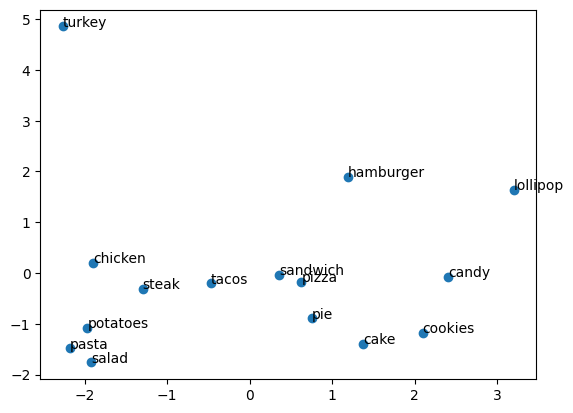

In [8]:
#visualize pca of word embeddings

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=["pasta","tacos","cookies", "cake", "pie", "candy", "lollipop", "sandwich", "hamburger", "steak", "chicken", "salad", "turkey","potatoes",  "pizza",]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

In [ ]:
#The distances and proximities do make since due to the pca of word embeddings

In [9]:
# repeat the process with a different pre-trained model and the same set of words. 
# What has changed in the embedding space? What might this have to do with the training data?
twitter_model= gensim.downloader.load("glove-twitter-100")
pca

[==================================================] 100.0% 387.1/387.1MB downloaded


PCA(n_components=2)

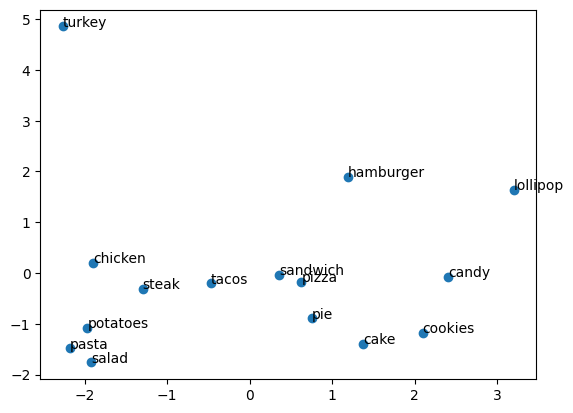

In [11]:
# repeat the process with a different pre-trained model and the same set of words. 
# What has changed in the embedding space? What might this have to do with the training data?
twitter_model= gensim.downloader.load("glove-twitter-100")
pca 
#visualize pca of word embeddings

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=["pasta","tacos","cookies", "cake", "pie", "candy", "lollipop", "sandwich", "hamburger", "steak", "chicken", "salad", "turkey","potatoes",  "pizza",]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X) 
plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

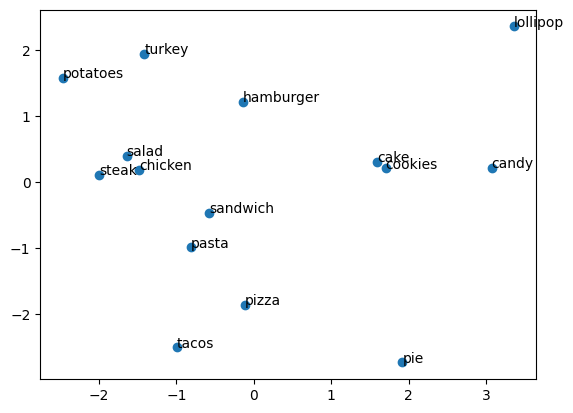

In [29]:
import gensim.downloader as api
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the GloVe Twitter model
twitter_model = api.load("glove-twitter-100")

# Define your set of words
words = ["pasta", "tacos", "cookies", "cake", "pie", "candy", 
         "lollipop", "sandwich", "hamburger", "steak", 
         "chicken", "salad", "turkey", "potatoes", "pizza"]

# Extract the word vectors from the Twitter model
X = [twitter_model[word] for word in words]

# Perform PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create the scatter plot
plt.scatter(X_pca[:, 0], X_pca[:, 1])

# Annotate the points with the corresponding words
for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i, 0], X_pca[i, 1]))

plt.show()

In [14]:
#From directions
import pandas as pd
uiuc=pd.read_csv("uiuc.csv") 
mich=pd.read_csv("umich.csv")  

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0  

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])



In [23]:
def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

In [24]:
import pandas as pd
mich['cleaned_text'] = mich['text'].apply(clean)

In [25]:
#import required libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import spacy
language_model = spacy.load("en_core_web_sm")
import matplotlib.pyplot as plt

import numpy as np

In [26]:
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(mich['cleaned_text'])

In [27]:
#do the same for the uiuc subreddit 
import pandas as pd
uiuc['cleaned_text'] = uiuc['text'].apply(clean)

In [ ]:
#import required libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import spacy
language_model = spacy.load("en_core_web_sm")
import matplotlib.pyplot as plt

import numpy as np

In [31]:
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(uiuc['cleaned_text'])

In [39]:
#here is a function to calculate the average embedding of a cleaned document
import numpy as np
#we can sum together all the embeddings to get a representation of all the concepts expressed in the document
def avg_embedding(sentence, model):
    words=sentence.split()
    embeddings=[model[word] for word in words if word in model]
    return np.mean(embeddings, axis=0)

sentences=list(uiuc["cleaned_text"])

#we can then calculate the average embedding of each sentence

avg_embeddings=[avg_embedding(sentence, model) for sentence in sentences]

#we can then plot the pca of these embeddings

pca=PCA(n_components=2)

X_pca=pca.fit_transform(avg_embeddings)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (X_pca[i,0],X_pca[i,1]))

plt.show()

c:\Users\16302\miniconda3\envs\is310\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\16302\miniconda3\envs\is310\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4725,) + inhomogeneous part.

In [38]:
avg_embeddings

[array([-0.03046107,  0.21456888,  0.13248311, -0.19683127,  0.02313899,
         0.10258012, -0.14012663,  0.1080251 , -0.11246866,  0.03477878,
         0.13221292, -0.02575101,  0.17815644,  0.06971332,  0.05068966,
        -0.26137388,  0.21626912,  0.18879177, -0.5239954 ,  0.21950325,
         0.08982435, -0.02943482,  0.28036544, -0.0252708 ,  0.00604508,
        -0.1858622 , -0.01644912, -0.3527619 ,  0.07401349, -0.04296367,
        -0.10804746,  0.42622817, -0.14624386,  0.09718592, -0.06520656,
         0.2711043 , -0.13445644,  0.3016239 , -0.04603588, -0.19495684,
        -0.46012968, -0.06099315, -0.08499299, -0.28365067, -0.20910427,
        -0.01191427,  0.13988706, -0.32146826, -0.02688039, -0.7000434 ,
         0.14495374, -0.01926111,  0.11522661,  0.7866639 , -0.22835106,
        -1.9968561 ,  0.03179971, -0.24138422,  1.3306482 ,  0.45560485,
        -0.1676085 ,  0.75491774, -0.26990533,  0.02901367,  0.62972695,
        -0.02827994,  0.52634454,  0.31971756,  0.2

In [40]:
!pip install transformers[torch]

   ---------------------------------------- 0.0/203.0 MB ? eta -:--:--
   ---------------------------------------- 2.1/203.0 MB 9.0 MB/s eta 0:00:23
    --------------------------------------- 4.2/203.0 MB 9.7 MB/s eta 0:00:21
   - -------------------------------------- 6.6/203.0 MB 10.1 MB/s eta 0:00:20
   - -------------------------------------- 8.9/203.0 MB 10.2 MB/s eta 0:00:19
   -- ------------------------------------- 10.7/203.0 MB 10.0 MB/s eta 0:00:20
   -- ------------------------------------- 12.8/203.0 MB 10.1 MB/s eta 0:00:19
   -- ------------------------------------- 15.2/203.0 MB 10.2 MB/s eta 0:00:19
   --- ------------------------------------ 17.3/203.0 MB 10.0 MB/s eta 0:00:19
   --- ------------------------------------ 19.4/203.0 MB 10.0 MB/s eta 0:00:19
   ---- ----------------------------------- 20.7/203.0 MB 9.7 MB/s eta 0:00:19
   ---- ----------------------------------- 22.8/203.0 MB 9.7 MB/s eta 0:00:19
   ---- ----------------------------------- 24.9/203.0 MB

In [1]:
# Use a pipeline as a high-level helper
from transformers import pipeline

#download bert model
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")

c:\Users\16302\miniconda3\envs\is310\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\16302\miniconda3\envs\is310\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\16302\.cache\huggingface\hub\models--finiteautomata--bertweet-base-sentiment-analysis. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrato

In [2]:
#use the pipeline to classify the sentiment of a sentence of your choice
pipe("I love this class")

[{'label': 'POS', 'score': 0.9923704862594604}]